# **Exploratory Data Analysis on NSL-KDD**

---



KDD Cup 99 and NSL-KDD datasets are considered as benchmarks within NIDS research. NSL-KDD is derived from the KDD Cup dataset to overcome the limitation of KDDCup dataset.  

This is our try on NSL-KDD dataset, which is a labeled dataset and all data point is assigned to the class normal or attack. Our objective is understanding the data sets by summarizing all features and selecting most useful features.

![alt text](https://static.packt-cdn.com/products/9781788831307/graphics/13a6defd-b5b4-4062-aad0-cb7464630a3c.png)
<center> <b>A standard machine learning pipeline </b> </center>
<center>(source: Practical Machine Learning with Python, Apress/Springer)</center>

This notebook will be divided into 5 parts.


1.   Loading dataset
2.   Dataset Overview
3.   Feature Extraction and Engineering   
4.   Feature selection
5.   Build a simple model



## Loading dataset


To starts with, we imported necessary libraries and loaded the data set.

In [1]:
%matplotlib inline
%config IPCompleter.greedy=True
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
import json
from sklearn.preprocessing import MinMaxScaler


In [2]:
train = pd.read_csv('data/KDDTrain+.txt', header=None)
test = pd.read_csv('data/KDDTest+.txt', header=None)

In [3]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


* It contains **43 features** per row, with 41 of the features referring to the traffic and the last two are **label** and **Score**.  
* Since the data files do not contain a header, we will need to add column header ourselves.


In [4]:
#Add header to Dataframe
col_names = np.array(['duration', 'protocol_type', 'service', 'flag', 'src_bytes','dst_bytes', 'land', 
'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 
'is_host_login','is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 
'srv_rerror_rate', 'same_srv_rate','diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
'dst_host_srv_rerror_rate', 'subclass', 'difficulty_level'])
# combined_data.columns = col_names
train.columns = col_names
test.columns = col_names
train['label'] = train.subclass.apply(lambda x: "normal" if x == "normal" else "attack")
test['label'] = test.subclass.apply(lambda x: "normal" if x == "normal" else "attack")
combined_data = pd.concat([train, test])

train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,subclass,difficulty_level,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,attack
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,normal


In [5]:
combined_data.shape

(148517, 44)

In [6]:
train.shape

(125973, 44)

* This dataset contains approximate **150k data  points**  and  is  combined from predefined  **training  and  test  subsets**.

In [7]:
test.shape

(22544, 44)

In [8]:
combined_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,subclass,difficulty_level,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,attack
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,normal


## Dataset Overview

In [9]:
print("Train set has " + str(len(train.subclass.unique())) + " subclasses.")
print("Test set has " + str(len(test.subclass.unique())) + " subclasses.")

Train set has 23 subclasses.
Test set has 38 subclasses.


* 15 subclasses are not availble in training data so we will need more general class to train the model. 
* The attack subclasses are grouped into 4 main classes as Denial of Service (DoS), Probe, User to Root(U2R), and Remote to Local (R2L). 

Take-away: So our model will need to learn some **generalizable features** that allowed it to classify **unseen** attack types. 

In [10]:
labels = defaultdict(list)
labels['normal'].append('normal')
f = open("data/attack_types.txt", "r")
for line in f:
    subclasses, classes = line.strip().split(' ')
    labels[classes].append(subclasses)
# mapping attack subclasses to attack classes
mapping = dict((v,k) for k in labels for v in labels[k]) 
print(dict(labels))

{'normal': ['normal'], 'dos': ['apache2', 'back', 'mailbomb', 'processtable', 'snmpgetattack', 'teardrop', 'smurf', 'land', 'neptune', 'pod', 'udpstorm'], 'u2r': ['ps', 'buffer_overflow', 'perl', 'rootkit', 'loadmodule', 'xterm', 'sqlattack', 'httptunnel'], 'r2l': ['ftp_write', 'guess_passwd', 'snmpguess', 'imap', 'spy', 'warezclient', 'warezmaster', 'multihop', 'phf', 'imap', 'named', 'sendmail', 'xlock', 'xsnoop', 'worm'], 'probe': ['nmap', 'ipsweep', 'portsweep', 'satan', 'mscan', 'saint']}


Let's see the distribution of labels across all dataset.

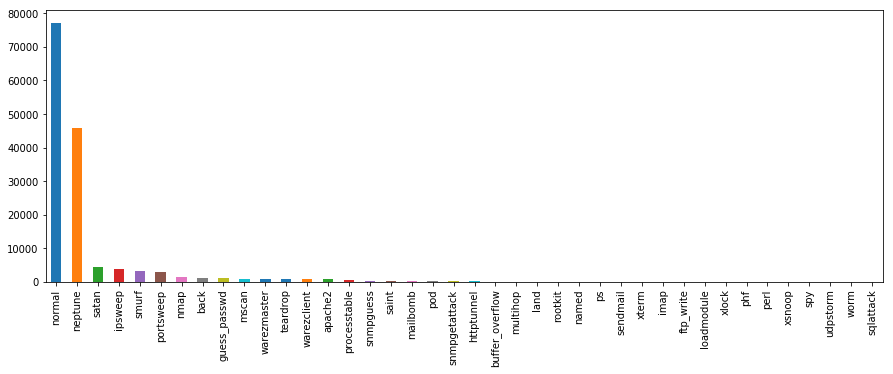

In [11]:
combined_data.subclass.value_counts().plot(kind='bar',figsize=(15,5))

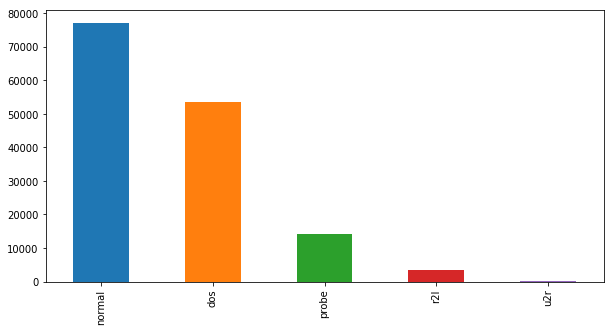

In [12]:
attack_label = combined_data.subclass.map(lambda x: mapping[x])
attack_label.value_counts().plot(kind='bar', figsize=(10, 5))

In [13]:
attack_label = combined_data.subclass.map(lambda x: mapping[x])
combined_data['type']=attack_label
attack_label1 = train.subclass.map(lambda x: mapping[x])
train['type']=attack_label1
attack_label2 = test.subclass.map(lambda x: mapping[x])
test['type']=attack_label2

Take-away: **Imbalanced** classes can result in an  bias in the classifier. 

In [14]:
# df = pd.DataFrame(columns = ['Train Dataset', 'Test Dataset'])
# df['Train Dataset'] = attack_label1
# df['Test Dataset'] = attack_label2
# df.plot(kind='bar', figsize=(10, 6))

In [15]:
# pd.concat([attack_label1, attack_label2], axis=1).plot(kind='bar', figsize=(10, 5))

normal    77054
attack    71463
Name: label, dtype: int64


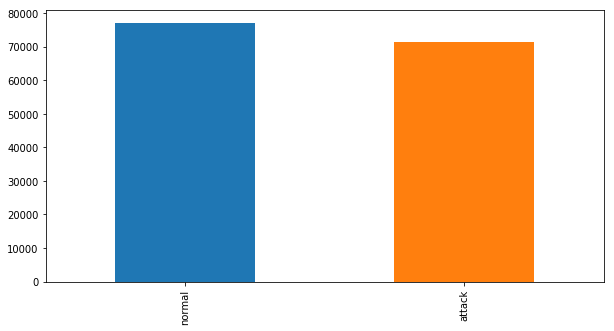

In [16]:
print(combined_data.label.value_counts())
combined_data.label.value_counts().plot(kind='bar', figsize=(10, 5))

### Input Analysis

In [17]:
f_names = defaultdict(list)
t = 0; f = open("data/kddcup.names.txt", "r")
for line in f:
    if (t==0): t = 1;continue
    name, dtype = line.strip()[:-1].split(': ')
    if (name == 'su_attempted' or name == 'root_shell'): continue
    f_names[dtype].append(name)
f_names['symbolic'].append('root_shell');f_names['symbolic'].append('su_attempted')
print(dict(f_names))

{'continuous': ['duration', 'src_bytes', 'dst_bytes', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'num_compromised', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate'], 'symbolic': ['protocol_type', 'service', 'flag', 'land', 'logged_in', 'is_host_login', 'is_guest_login', 'root_shell', 'su_attempted']}


First, we will split data into diffetent types.

In [18]:
binary_features = ['land',"logged_in","is_host_login",
                   "is_guest_login","root_shell","su_attempted"];
categorical_features = list(set(f_names['symbolic']) - set(binary_features))
numerical_features = f_names['continuous']

Let's take a look at the binary features.

In [19]:
combined_data[binary_features].describe()

,land,logged_in,is_host_login,is_guest_login,root_shell,su_attempted
count,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000
mean,0.000215,0.402789,0.000081,0.012308,0.001508,0.000976
std,0.014677,0.490461,0.008988,0.110259,0.038807,0.042389
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


Let's take a look at the categorical features.

In [20]:
combined_data[categorical_features].describe()

,protocol_type,service,flag
count,148517,148517,148517
unique,3,70,11
top,tcp,http,SF
freq,121569,48191,89820


In [21]:
combined_data.protocol_type.value_counts()

tcp     121569
udp      17614
icmp      9334
Name: protocol_type, dtype: int64

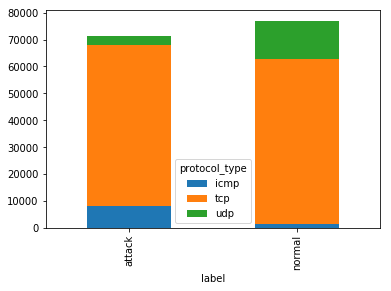

In [22]:
pd.crosstab(combined_data.label, combined_data.protocol_type).plot.bar(stacked=True)

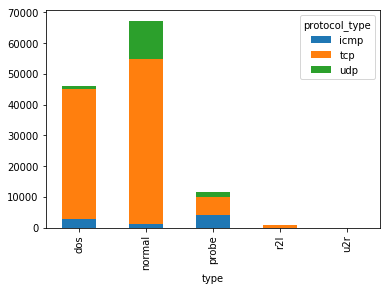

In [23]:
pd.crosstab(train.type, train.protocol_type).plot.bar(stacked=True)

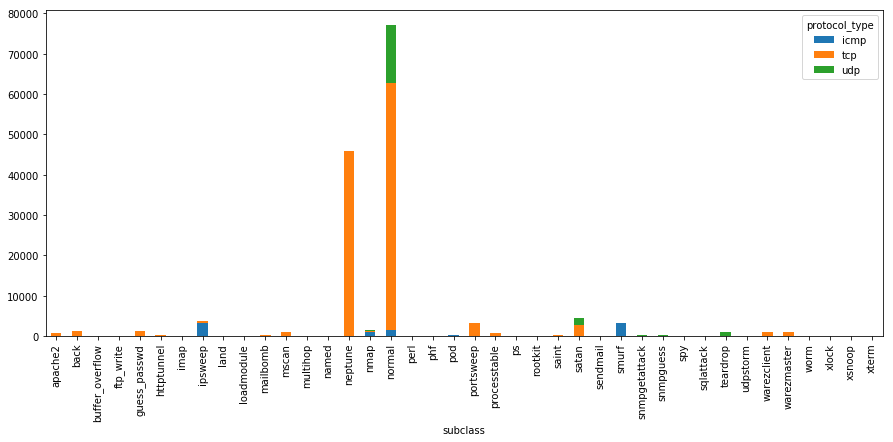

In [24]:
pd.crosstab(combined_data.subclass, combined_data.protocol_type).plot(stacked=True, kind='bar', figsize=(15, 6))

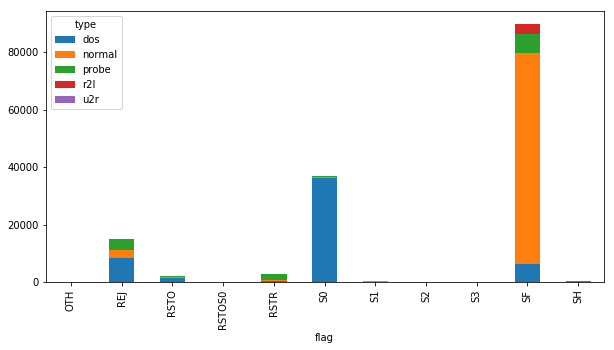

In [25]:
pd.crosstab(combined_data.flag, combined_data.type).plot(stacked=True,kind='bar',figsize=(10,5))


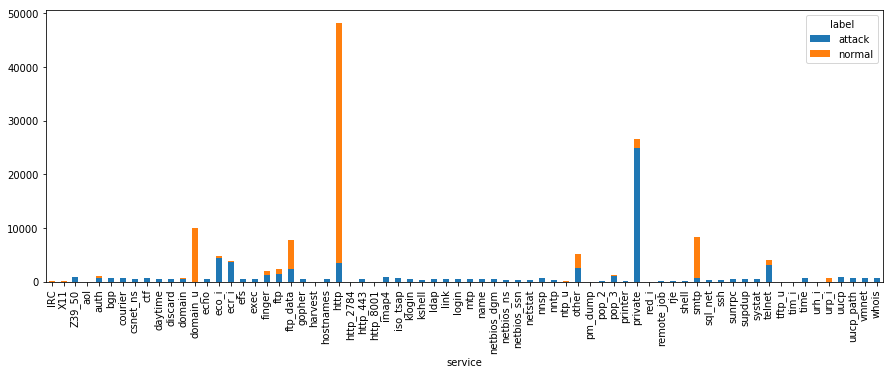

In [26]:
pd.crosstab(combined_data.service, combined_data.label).plot(stacked=True,kind='bar',figsize=(15,5))


In [27]:
pd.crosstab(attack_label, combined_data.service)

service,IRC,X11,Z39_50,aol,auth,bgp,courier,csnet_ns,ctf,daytime,...,telnet,tftp_u,tim_i,time,urh_i,urp_i,uucp,uucp_path,vmnet,whois
subclass,,,,,,,,,,,,,,,,,,,,,
dos,0,0,896,0,747,744,765,567,579,530,...,2124,0,8,581,0,0,816,722,649,710
normal,196,71,0,0,255,0,0,0,0,0,...,961,4,6,81,10,617,0,0,0,0
probe,3,7,11,2,16,12,9,12,25,19,...,363,0,0,28,0,4,14,13,11,23
r2l,1,10,0,0,4,0,0,0,0,0,...,457,0,0,0,0,4,0,0,0,0
u2r,0,0,0,0,0,0,0,0,0,0,...,74,0,0,0,0,0,0,0,0,0


In [28]:
combined_data[['num_outbound_cmds','num_access_files']].describe()

,num_outbound_cmds,num_access_files
count,148517.0,148517.000000
mean,0.0,0.004013
std,0.0,0.095257
min,0.0,0.000000
25%,0.0,0.000000
50%,0.0,0.000000
75%,0.0,0.000000
max,0.0,9.000000


In [29]:
combined_data.num_outbound_cmds.describe()

count    148517.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: num_outbound_cmds, dtype: float64

## Feature Extraction and Engineering



In [30]:
# Fix wrong value
train.su_attempted.replace(2, 0, inplace=True)
test.su_attempted.replace(2, 0, inplace=True)
# Delete not useful feature
train.drop('num_outbound_cmds', axis=1, inplace=True)
test.drop('num_outbound_cmds', axis=1, inplace=True)
numerical_features.remove('num_outbound_cmds')
combined_data = pd.concat([train, test])


In [31]:
# scaling continous values
def minmax_scale_values(training_df,testing_df, col_name):
    scaler = MinMaxScaler()
    scaler = scaler.fit(training_df[col_name].values.reshape(-1, 1))
    train_values_standardized = scaler.transform(training_df[col_name].values.reshape(-1, 1))
    training_df[col_name] = train_values_standardized
    test_values_standardized = scaler.transform(testing_df[col_name].values.reshape(-1, 1))
    testing_df[col_name] = test_values_standardized

In [32]:
# one hot encoding
def encode_text(training_df,testing_df, name):
    training_set_dummies = pd.get_dummies(training_df[name])
    testing_set_dummies = pd.get_dummies(testing_df[name])
    for x in training_set_dummies.columns:
        dummy_name = "{}_{}".format(name, x)
        training_df[dummy_name] = training_set_dummies[x]
        if x in testing_set_dummies.columns :
            testing_df[dummy_name]=testing_set_dummies[x]
        else :
            testing_df[dummy_name]=np.zeros(len(testing_df))
    training_df.drop(name, axis=1, inplace=True)
    testing_df.drop(name, axis=1, inplace=True)

In [33]:
#  split the test and train into data and labels:
label_column=["subclass",'label','difficulty_level','type']
train_Y = train[label_column]
train_x_raw = train.drop(label_column, axis=1)

test_Y = test[label_column]
test_x_raw = test.drop(label_column, axis=1)

In [34]:
# Apply to all features
for column in train_x_raw.columns:
    if column in categorical_features:
        encode_text(train_x_raw,test_x_raw,column)
    else:
        minmax_scale_values(train_x_raw,test_x_raw,column)
        

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.

## Feature selection



In [35]:
# will do in the future

## Build a simple model

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, zero_one_loss

# Use DecisionTree
classifier = DecisionTreeClassifier(random_state=17)
classifier.fit(train_x_raw, train_Y.type)

pred_y = classifier.predict(test_x_raw)

results = confusion_matrix(test_Y.type, pred_y)
error = zero_one_loss(test_Y.type, pred_y)

print(results)
print(error)


[[5872 1559   71  134    0]
 [  71 9078  557    5    0]
 [ 396  490 1535    0    0]
 [   1 1742  340  483   10]
 [   0  133   44    6   17]]
0.24658445706174592


In [37]:
train_x = train_x_raw
train_y = train_Y

label_dict = {'normal': 0, 'dos': 1, 'r2l': 2, 'probe': 3, 'u2r':4}
train_y['type'] = train_y.type.apply(lambda x: label_dict[x])
train_y = train_y['type']
print(train_y.unique())

train_x = train_x.values
train_y = train_y.values
print(type(train_x), train_x.shape)
print(type(train_y), train_y.shape)


[0 1 2 3 4]
<class 'numpy.ndarray'> (125973, 121)
<class 'numpy.ndarray'> (125973,)


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [38]:
test_x = test_x_raw
test_y = test_Y
test_y['type'] = test_y.type.apply(lambda x: label_dict[x])
test_y = test_y['type']
print(test_y.unique())

test_x = test_x.values
test_y = test_y.values
print(type(test_x), test_x.shape)
print(type(test_y), test_y.shape)

[1 0 3 2 4]
<class 'numpy.ndarray'> (22544, 121)
<class 'numpy.ndarray'> (22544,)


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Requirement already up-to-date: tensorflow==2.0 in /usr/local/lib/python3.7/site-packages (2.0.0)


NameError: name 'tensorflow' is not defined

In [46]:
import tensorflow as tf

input_dim = train_x.shape[1]
output_dim = len(label_dict)

tf.reset_default_graph()

# model = tf.keras.models.Sequential([
#     tf.keras.layers.Dense(input_dim, input_shape=(input_dim,), activation='relu'),
#     tf.keras.layers.Dense(28, activation='relu'),
#     tf.keras.layers.Dense(28, activation='relu'),
#     tf.keras.layers.Dense(input_dim, activation='sigmoid')
# ])

in_data = tf.keras.Input(shape=(input_dim,))
x = tf.keras.layers.Dense(input_dim, activation='relu')(in_data)
encoded = tf.keras.layers.Dense(14, activation='relu')(x)
encoded = tf.keras.layers.Dense(28, activation='relu')(encoded)
encoded = tf.keras.layers.Dense(28, activation='relu')(encoded)
out_layer = tf.keras.layers.Dense(input_dim, activation='sigmoid')(encoded)

model = tf.keras.Model(inputs=in_data, outputs=out_layer)

model.compile(optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(train_x, train_x, epochs=2)

model.evaluate(test_x, test_x, verbose=2)

1.4.0


AttributeError: module 'tensorflow.python.keras' has no attribute 'Model'

In [ ]:
out = model.layers[4].output
print(type(out), out.shape)

### Conclusion
* Understood the data sets by summarizing all features
* Done simple extract featuring and engineering
* Built a simple model

### Future work:
* Deal with imblanced class
* Improve Feature Engineering by using other methods
* Implement Feature Selection 




### References: 
* Nsl-kdd data set for NID: https://www.unb.ca/cic/datasets/nsl.html
* KddCup99 Task: https://kdd.ics.uci.edu/databases/kddcup99/task.html
* H. ASSI, Jamal; T. SADIQ, Ahmed. NSL-KDD dataset Classification Using Five Classification Methods and Three Feature Selection Strategies. Journal of Advanced Computer Science and Technology Research, [S.l.], v. 7, n. 1, mar. 2017.
* Kani, Selva. (2007). Feature Selection for Intrusion Detection Using KDD Data Set. International Journal of Engineering and Technology. 1. 44-49. 
* C.Chio and E. Freeman; Machine Learning and Security: Protecting Systems with Data and Algorithms: 